In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
# import some data to play with
company_data = pd.read_csv("Company_Data.csv")

In [4]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
company_data.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
company_data.shape

(400, 11)

In [9]:
company_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [11]:
company_data["sales"]="<=7.49"
company_data.loc[company_data["Sales"]>=7.49,"sales"] =">=7.49"
y=company_data["Sales"]
x=company_data.drop(["Sales"],axis=1,inplace=True)

In [12]:
company_data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,>=7.49
1,111,48,16,260,83,Good,65,10,Yes,Yes,>=7.49
2,113,35,10,269,80,Medium,59,12,Yes,Yes,>=7.49
3,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.49
4,141,64,3,340,128,Bad,38,13,Yes,No,<=7.49


In [13]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in company_data.columns:
    if company_data[column_name].dtype == object:
        company_data[column_name] = le.fit_transform(company_data[column_name])
    else:
        pass

In [18]:
# spliting data into input and output
features = company_data.iloc[:,0:10]
labels = company_data.iloc[:,10]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,stratify = labels)

In [22]:
model = tree.DecisionTreeClassifier(random_state=1,max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

[Text(167.4, 190.26, 'X[4] <= 92.5\ngini = 0.5\nsamples = 320\nvalue = [159, 161]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\ngini = 0.212\nsamples = 58\nvalue = [7, 51]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 58.0\ngini = 0.432\nsamples = 19\nvalue = [6, 13]'),
 Text(20.925, 27.180000000000007, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(125.55000000000001, 81.53999999999999, 'X[4] <= 90.5\ngini = 0.05\nsamples = 39\nvalue = [1, 38]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(146.475, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.5\ngini = 0.487\nsamples = 262\nvalue = [152, 110]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 115.5\ngini = 0.239\nsamples = 65\nvalue = [56, 9]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.198\nsamples = 63\nvalue = [56, 7]'),
 Text(230.17

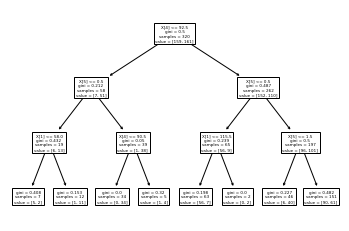

In [24]:
# plot the decision tree
tree.plot_tree(model)

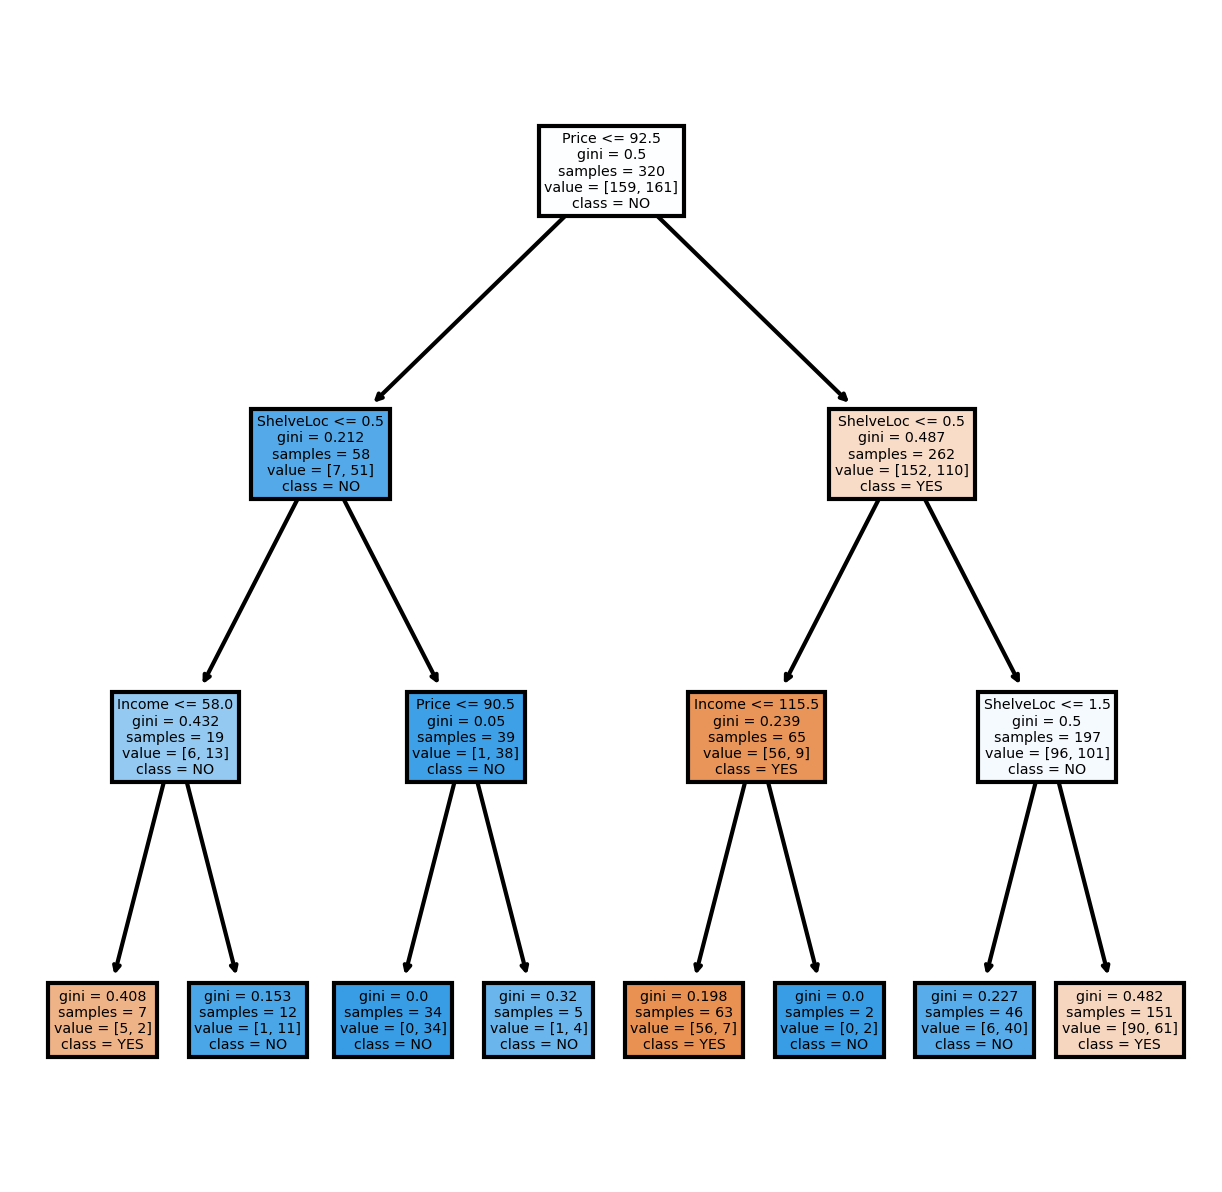

In [27]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','income']
cn=['YES','NO']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [28]:
model.feature_importances_

array([0.        , 0.11329259, 0.        , 0.        , 0.35104029,
       0.53566712, 0.        , 0.        , 0.        , 0.        ])

In [29]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.75625

In [30]:
model.score(x_test,y_test)

0.6375

In [31]:
model.feature_importances_

array([0.        , 0.11329259, 0.        , 0.        , 0.35104029,
       0.53566712, 0.        , 0.        , 0.        , 0.        ])

In [32]:
y_pred = model.predict(x_test)


In [33]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])